In [57]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv(load_boston()['filename'], skiprows=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [59]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

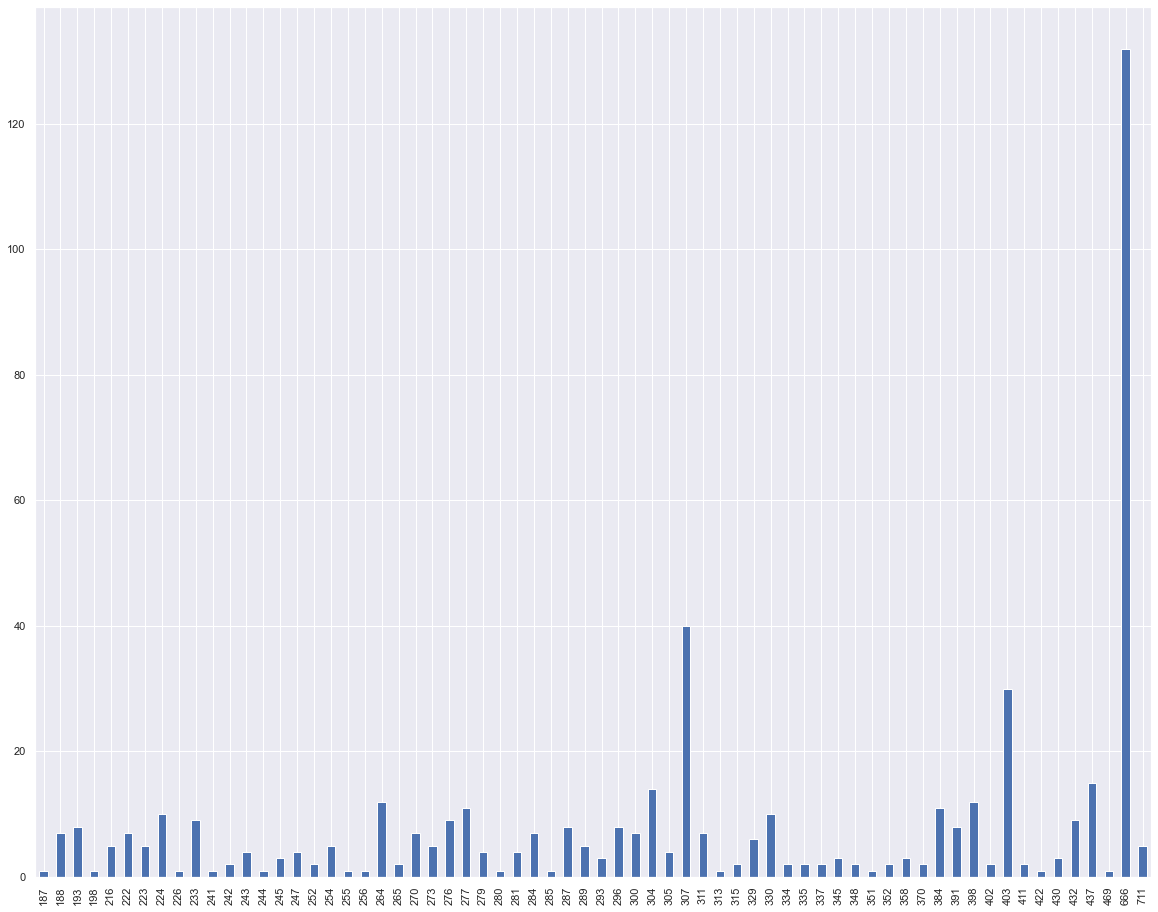

In [60]:
# смотрим выбросы по налогам (TAX)
sns.set(rc=({'figure.figsize':(20, 16)}))
data.TAX.value_counts().sort_index().plot(kind='bar')

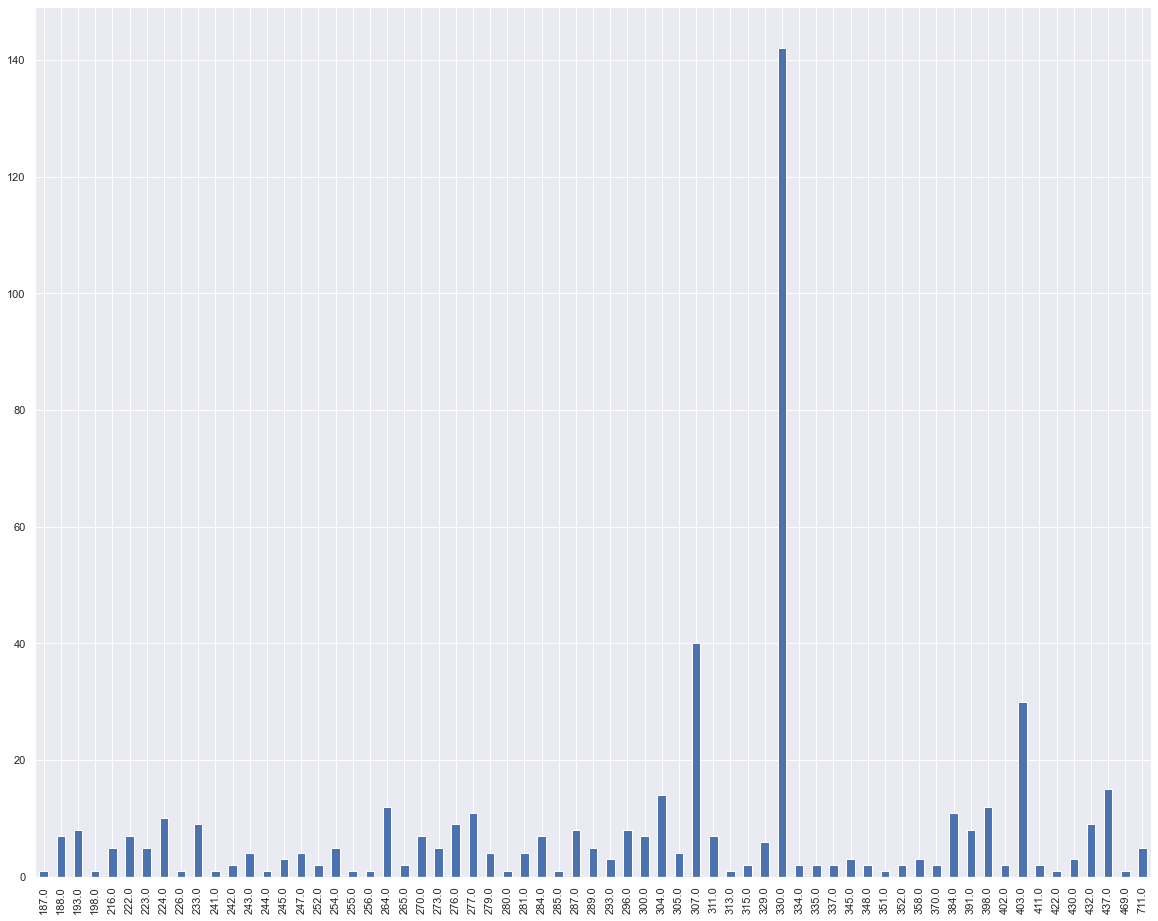

In [61]:
# 666 похоже на аномалию (хотя, если посмотреть на 307 или 403 - не факт). Но согласно замечаниям преподавателя -
# уберем ее методом приведения к медиане

data.loc[data['TAX'] == 666, 'TAX'] = data.TAX.median()
data.TAX.value_counts().sort_index().plot(kind='bar')

In [62]:
# строим модель на данных "как есть" чтообы понимать от какого результата идём

from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

X = data.iloc[:,:13]
Y = data.iloc[:,13:]
reg = LinearRegression().fit(X, Y)
# print('Weights: {}'.format(reg.coef_))
# print('Bias: {}'.format(reg.intercept_))

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, Y)*100/data.MEDV.mean()))

Error, %: 14.57441338500245


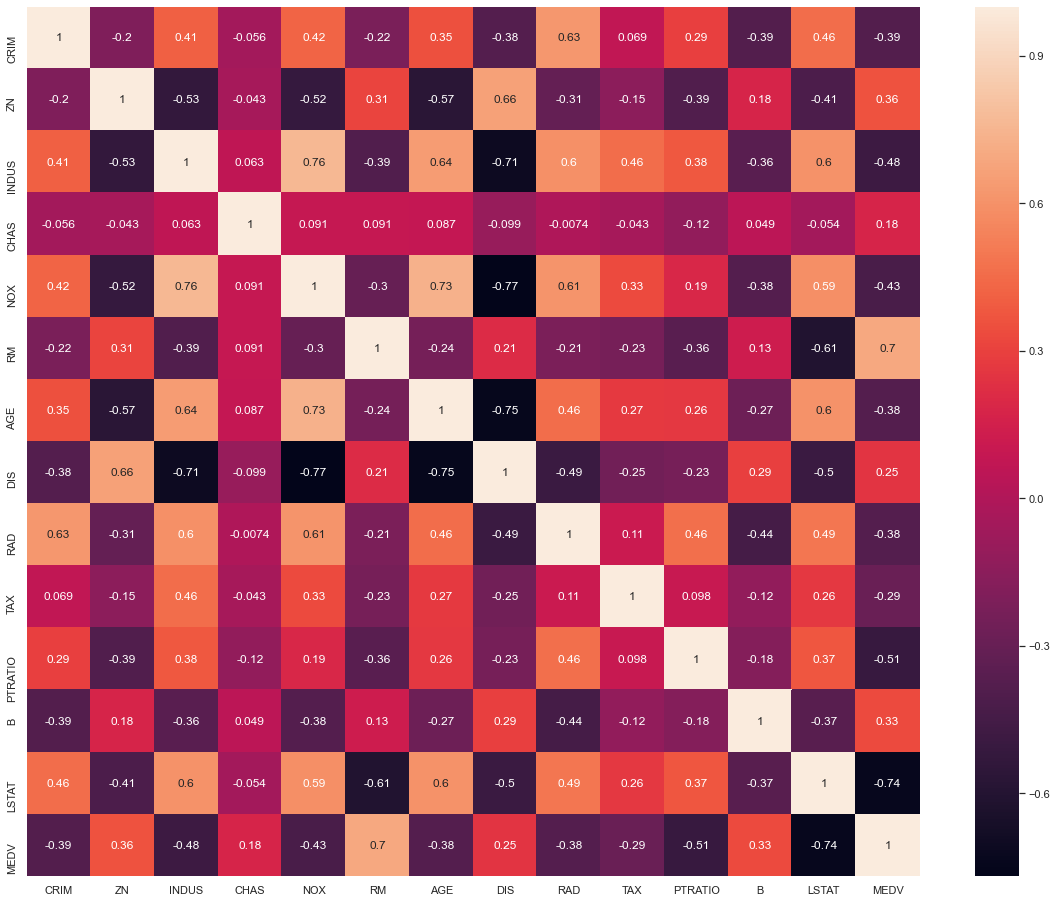

In [63]:
import seaborn as sns
mcorr = data.corr()
sns.set(rc=({'figure.figsize':(20, 16)}))
sns.heatmap(mcorr, annot=True)

In [64]:
# пробуем убрать самые нескореллированные данные

data_new = data.drop(['CHAS'], axis = 1)

X = data_new.iloc[:,:11]
Y = data_new.iloc[:,11]
reg = LinearRegression().fit(X, Y)

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, Y)*100/data.MEDV.mean()))

Error, %: 13.119207688029226


In [65]:
# пробуем наоборот, самые скореллированные данные

X = data[['RM', 'LSTAT', 'INDUS', 'PTRATIO']]
Y = data['MEDV']
reg = LinearRegression().fit(X, Y)

pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, Y)*100/data.MEDV.mean()))

Error, %: 16.163907006345074


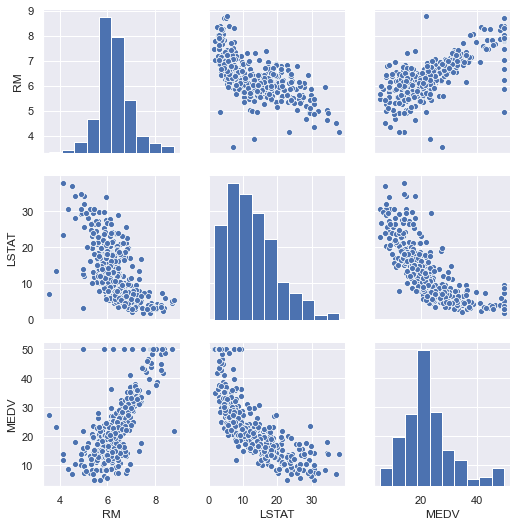

In [66]:
sns.pairplot(data[['RM', 'LSTAT', 'MEDV']])

In [67]:
data.MEDV.value_counts().sort_index()

5.0      2
5.6      1
6.3      1
7.0      2
7.2      3
        ..
46.7     1
48.3     1
48.5     1
48.8     1
50.0    16
Name: MEDV, Length: 229, dtype: int64

In [68]:
#  Есть предположение, что под цифрой "50" скрывается "все, что больше 50". Уберём ее
data = data[data['MEDV'] < 50]

In [69]:
# пробуем модель, уже лучше

X = data_new.iloc[:,:-1]
Y = data_new.MEDV
reg = LinearRegression().fit(X, Y)
print('Weights: {}'.format(reg.coef_))
pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, Y)*100/data_new.MEDV.mean()))

Weights: [-1.16570789e-01  4.10396309e-02  1.25644382e-02 -1.75136177e+01
  3.88801278e+00  3.16528681e-03 -1.46972321e+00  1.13994075e-01
 -1.09995180e-02 -1.02646058e+00  9.90765531e-03 -5.34782119e-01]
Error, %: 14.661595949552284


In [70]:
# Вспоминаем, что регрессия у нас линейная, а судя по графику, зависимость LSTAT-MEDV вышла квадратичная
# Приводим ее к линейной

import math
data_new['LSTATSQ'] = data_new['LSTAT'].astype(float) ** 0.5


In [71]:
# Строим модель

X = data_new.drop(['MEDV', 'LSTAT'], axis=1)
Y = data_new.MEDV
reg = LinearRegression().fit(X, Y)
print('Weights: {}'.format(reg.coef_))
pred_values = reg.predict(X)
print('Error, %: {}'.format(mean_absolute_error(pred_values, Y)*100/data_new.MEDV.mean()))

Weights: [-1.20024610e-01  3.27901878e-02  1.98478509e-02 -1.65749481e+01
  3.04399345e+00  2.04711202e-02 -1.35337326e+00  1.20407866e-01
 -1.06180946e-02 -9.70886678e-01  8.61857585e-03 -5.00682896e+00]
Error, %: 14.119070778442142
